In [102]:
# Importing Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# Import the dataset
df = pd.read_csv('mushrooms.csv')


# EDA

In [65]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [66]:
# data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [67]:
columns = list(df.columns)

In [68]:
# Checking unique values in each column
value_counts = df.nunique()
value_counts

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [69]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# Correlation Check

In [70]:
df_corr = df.apply(lambda x: x.factorize()[0]).corr()

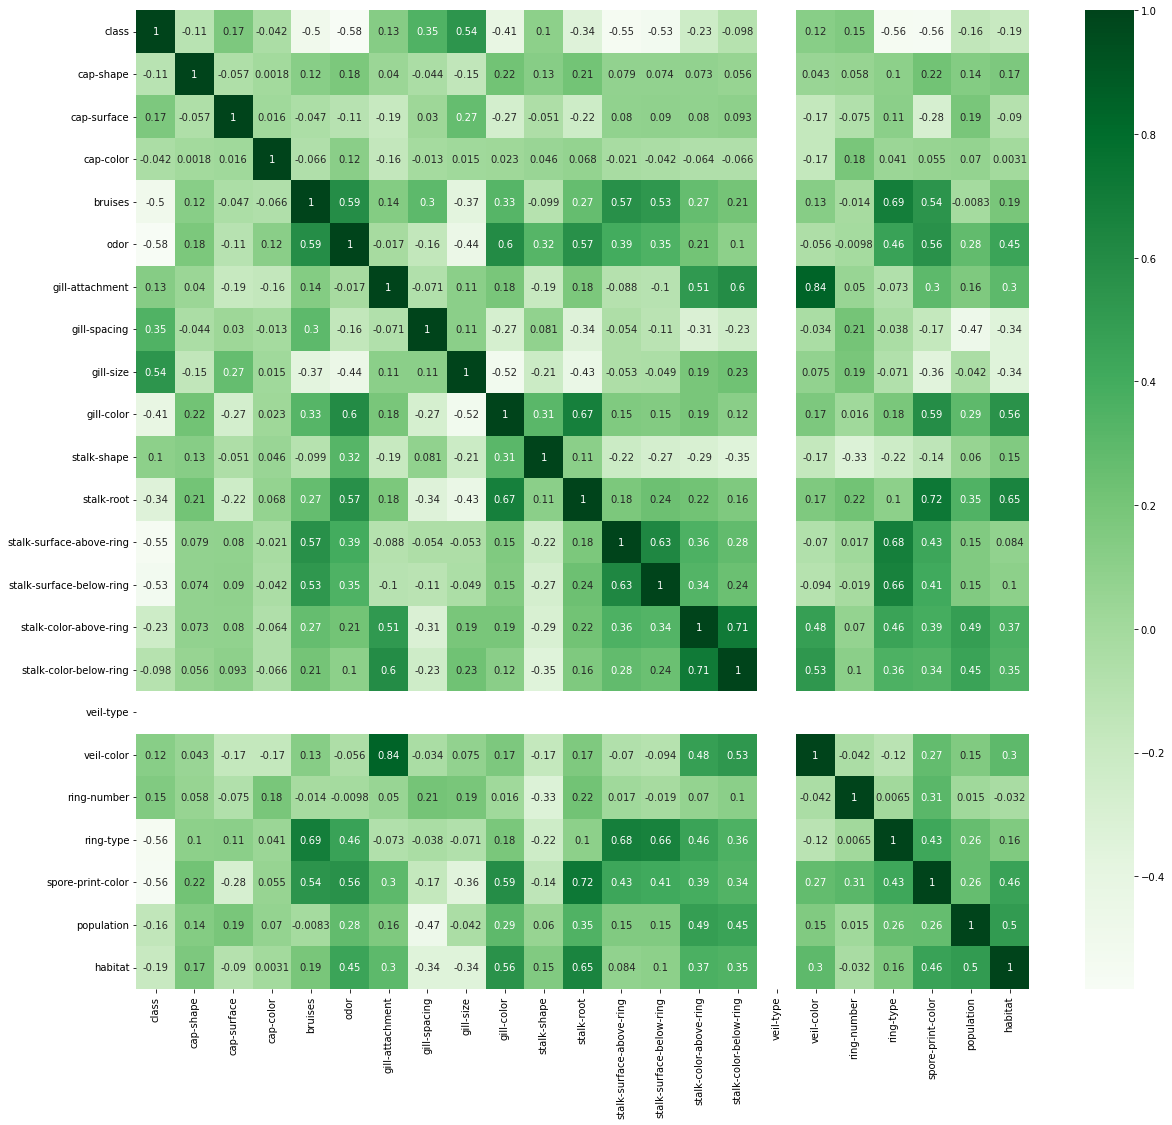

In [71]:
# Plotting the correlation matrix
plt.figure(figsize=(20,18))
sns.heatmap(df_corr, cmap="Greens",annot=True)
plt.show()

In [72]:
y = df['class']
y.shape

(8124,)

# Feature Selection

In [100]:
top_10 = list(df_corr['class'].sort_values(key= abs, ascending=False)[1:11].index)
top_10

['odor',
 'spore-print-color',
 'ring-type',
 'stalk-surface-above-ring',
 'gill-size',
 'stalk-surface-below-ring',
 'bruises',
 'gill-color',
 'gill-spacing',
 'stalk-root']

Top 10 features were enough to predict the outcome

In [101]:
# X = df.drop(['class', 'veil-color'], axis=1)
X = df[top_10]
X.shape

(8124, 10)

In [75]:
# Packages for modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# LabelEncoding

In [76]:
le = LabelEncoder()

In [77]:
y = le.fit_transform(y)

In [78]:
for i in X.columns:
    X[i] = le.fit_transform(X[i])

/tmp/ipykernel_4722/1176763439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = le.fit_transform(X[i])


In [79]:
X.head()

,odor,spore-print-color,ring-type,stalk-surface-above-ring,gill-size,stalk-surface-below-ring,bruises,gill-color,gill-spacing,stalk-root
0,6,2,4,2,1,2,1,4,0,3
1,0,3,4,2,0,2,1,4,0,2
2,3,3,4,2,0,2,1,5,0,2
3,6,2,4,2,1,2,1,5,0,3
4,5,3,0,2,0,2,0,4,1,3


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Using LogisticRegression

In [81]:
logreg = LogisticRegression(max_iter= 2000)

In [82]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [83]:
y_pred = logreg.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score, classification_report

In [85]:
score = accuracy_score(y_pred, y_test)
score

0.9392945036915504

# USING K-Nearest Neighbor

In [86]:
# using KNN
from sklearn.neighbors import KNeighborsClassifier

In [96]:
knn = KNeighborsClassifier(n_neighbors=2)

In [97]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [98]:
y_pred_knn = knn.predict(X_test)

In [99]:
score_knn = accuracy_score(y_pred_knn, y_test)
score_knn

1.0